# Project 4, APS1070 Winter 2023
#### **Linear Regression -  15 points**
**Deadline: April 3rd, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: 
*   Your **student number**: 

### How to submit **(HTML [This notebook] + IPYNB + GitHub [Part 6])**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files for this notebook on Quercus for grading.

7. Make sure you compeleted the last part on <font color='red'>**GitHub**</font> and added your link to the last cell here. The teaching team will view and grade your part 7 on GitHub.



Ref: https://stackoverflow.com/a/64487858 

## Part 1 - Getting Started [2 marks]

In this project, we are going to design a mathematical model that predicts the critical temperature of a superconductor, as described in the paper below:

*Hamidieh, Kam, A data-driven statistical model for predicting the critical temperature of a superconductor, Computational Materials Science, Volume 154, November 2018, Pages 346-354*

The following dataset contains 21263 instances, where each instance is a set of 81 features describing the superconductor's status. Our goal is to use these features to predict the `critical_temp` column, which is a setting that the design should take into account. We will make our predictions by implementing linear regression.

In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv("https://raw.githubusercontent.com/APS1070-W23/datasets/main/superconduct.csv" , skipinitialspace=True)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[1.5]**
*   Using `train_test_split` from Sklearn, split the dataset into training and validation sets ($80\%$ training, $20\%$ validation). When splitting, set `random_state=1`. **[0.5]**

Ans: see cell #3
*   Standardize the data **manually** according to the same method as `StandardScaler` from sklearn, but you may not directly use `StandardScaler'. **[0.5]**

Ans: see cell #3
*   Insert a first column of all $1$s in both the training and validation data sets. **[0.5]**

Ans: see cell #3
3. Explain why we should not insert the column of $1$s prior to standardization. **[0.5]**

Ans: If we insert it before standardization, then the column of all 1s will also be standardized after we do standardization. In this case, we will fail to obtain a column of all 1s.

In [2]:
### YOUR CODE HERE ###
# print dataframe
df

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [3]:
# prepare datasets
from sklearn.model_selection import train_test_split

df_labels = df['critical_temp']
df_features = df.drop(columns = ['critical_temp'])

x_train, x_val, y_train, y_val = train_test_split(df_features, df_labels, test_size=0.2, random_state=1)

#manually standardize datasets
x_train_std = (x_train - x_train.mean())/x_train.std()
x_val_std = (x_val - x_val.mean())/x_val.std()
y_train_std = y_train
y_val_std = y_val
#Insert a first column of all  1 s in both the training and validation data sets. [0.5]
train_size = len(x_train_std)
val_size = len(x_val_std)
train_1s = [1] * train_size
val_1s = [1] * val_size

x_train_std.insert(0, "all_1", train_1s)
x_val_std.insert(0, "all_1", val_1s)


## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note: You should use scipy.linalg.inv to perform the inversion, as numpy.linalg.inv may caue an error.**

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.


Ans: see cell #4.

In [4]:
### YOUR CODE HERE ###
import scipy
from sklearn.metrics import mean_squared_error
# W = np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))
W = np.dot(scipy.linalg.inv(np.dot(x_train_std.T, x_train_std)), np.dot(x_train_std.T, y_train))
train_prediction = np.dot(x_train_std, W)
val_prediction = np.dot(x_val_std, W)

# find RMSE
rmse_train = np.sqrt(mean_squared_error(train_prediction, y_train_std))
rmse_val = np.sqrt(mean_squared_error(val_prediction, y_val_std))
print(f"RMSE for training set: {rmse_train}")
print(f"RMSE for validation set: {rmse_val}")




RMSE for training set: 17.495025140326373
RMSE for validation set: 17.848835825933993


## Part 3 - Full Batch Gradient Descent [3 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data. 

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges. 

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you calculated in the previous part. 

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[1]**

Ans: see cell#5.

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[1]**

Ans: see cell #5.
* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

Ans: From the training and validation RMSE graph, we see that both training and validation RMSE decreases during the training and both of them arrive at a low value close to each other. This indicates that the model is not overfitted or underfitted and is performing well. When model is overfitted, training RMSE will be low and validation RMSE will be high. If model is underfitted, both training and validation RMSE will be high.

**Hint**: Initialize your weights with small random numbers (<$0.001$)

RMSE converged at epoch 97288
--- Total Training Time: 242.84122562408447 (s) ---


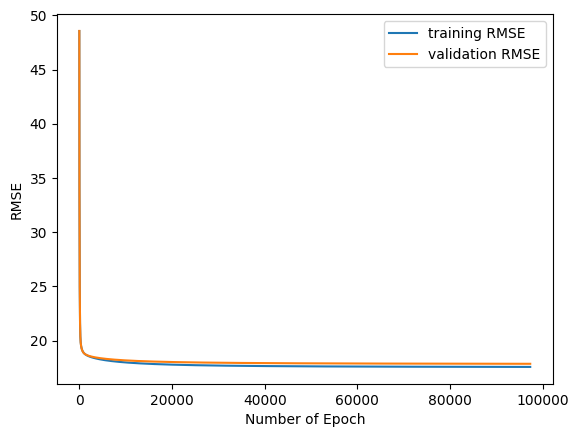

In [5]:
import time
import matplotlib.pyplot as plt
import random
random.seed(10)


start_time = time.time() ## Records current time

## GD Script -- Sample code in tutorial! ##
CT = 1.001 * rmse_val
w = (np.random.random(x_train_std.shape[1])) * 0.001 ### Inital weights
lr = 0.01  ### Learning rate

rmse_train_list =[]
rmse_val_list = []
epoch_list = []

# convert pandas dataframe to np array to speed up process
x_train_std = x_train_std.to_numpy()
y_train_std = y_train_std.to_numpy()
x_val_std = x_val_std.to_numpy()
y_val_std = y_val_std.to_numpy()
for epoch in range (0, 150000): 
  train_prediction = np.dot(x_train_std,w.T)
  rmse_train = np.sqrt(mean_squared_error(train_prediction, y_train_std))
  rmse_train_list.append(rmse_train)

  val_prediction = np.dot(x_val_std,w.T)
  rmse_val = np.sqrt(mean_squared_error(val_prediction, y_val_std))
  rmse_val_list.append(rmse_val)
  epoch_list.append(epoch)
  if rmse_val <= CT: # converge check
    print(f"RMSE converged at epoch {epoch}")
    print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))
    # make plot
    plt.plot(epoch_list, rmse_train_list, label = 'training RMSE')
    plt.plot(epoch_list, rmse_val_list, label = 'validation RMSE')
    plt.xlabel("Number of Epoch")
    plt.ylabel("RMSE")
    plt.legend()
    plt.show()
    break
  else:
    gradient = (1/len(y_train_std) * np.dot(x_train_std.T, train_prediction-y_train_std))
    w = w - lr * gradient ### weight update






## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are: 
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays: 
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes: 
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged. 
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`. 

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values that **converge**), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

  Ans: see cell #6.

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**

  Ans: see cell #7.
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**

  Ans: see cell #8.
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

  Ans: see cell #9.

Describe your findings, including the main takeaways from each of your plots. **[1]**

Ans: For the first graph, we see that the curves for different batch sizes are very similar, the larger the batch size, the more the number of epochs required in order to converge. The final convergence RMSE is similar among all batch sizes.

For the second graph, the curves for different batch sizes are also similar. The larger the batch size, the longer it takes to converge. This is because a larger batch size can lead to a noisier estimate of the gradient, which can cause our model to converge slower.

For the third graph, we can see that as the number of batch sizes increase, the total training time also increases but not much. However as the number of batch size approches 0, the total training time explodes to a large value. This is because when the batch size is very small, the model needs to update its parameters very frequently, leading to slower convergence.

In [6]:
### YOUR CODE HERE ###
def part4 (x_train, y_train, x_val, y_val, batch_size, lr, threshold):
  np.random.seed(40)
  final_weights = []
  rmse_train_list = []
  rmse_val_list = []
  elapsed_time = []
# init weights, rmse_val and start time
  w = (np.random.random(x_train.shape[1])) * 0.001 # Inital weights
  start_time = time.time()
  rmse_val = 2* threshold 
  first_epoch_flag = True
  stopping_count = 0 # a counter to decide early stopping
  epoch_count = 0
  diverge_flag = False
  while rmse_val > threshold:
    # do a full batch of training
    #print(f"epoch {epoch_count}: rmse {rmse_val} before training")
    for batch_counter in range (0, x_train.shape[0], batch_size):
      batch_x_train = x_train[batch_counter: batch_counter + batch_size]
      batch_y_train = y_train[batch_counter: batch_counter + batch_size]
      batch_prediction = np.dot(batch_x_train, w.T)
      gradient = (1/len(batch_y_train) * np.dot(batch_x_train.T, batch_prediction-batch_y_train))
      w = w - lr * gradient ### weight update
    
    #calculate RMSEs and decide whether to stop training 
    train_pred = np.dot(x_train, w.T)
    rmse_train = np.sqrt(mean_squared_error(train_pred, y_train))
    val_pred = np.dot(x_val, w.T)
    rmse_val = np.sqrt(mean_squared_error(val_pred, y_val))
    if first_epoch_flag == False: # we cannot do early stopping at the first epoch
      if rmse_val > rmse_val_list[-1]:
        #print("rmse increase triggered ***************************")
        stopping_count += 1
        if stopping_count >= 6: # rmse increases 6 times in a row, we do early stopping
          print(f"Early stopping: model cannot converge with batch size {batch_size}")
          diverge_flag = True
          break
      else:
        #print("stopping counter cleared &&&&&&&&&&&&&&&&&&&&&&&&&&")
        stopping_count = 0
  
    first_epoch_flag = False # set flag
    # shuffle training set
    shuffle = np.random.permutation(y_train.shape[0])
    x_train = x_train[shuffle]
    y_train = y_train[shuffle]

    final_weights.append(w)
    rmse_train_list.append(rmse_train)
    rmse_val_list.append(rmse_val)
    elapsed_time.append(time.time() - start_time)
    #print(f"epoch {epoch_count}: rmse {rmse_val} after training")
    epoch_count += 1
  return final_weights[-1], rmse_train_list, rmse_val_list, elapsed_time, diverge_flag




    


Training with batch_size 32
Batch_size 32 has converged!
Training with batch_size 64
Batch_size 64 has converged!
Training with batch_size 128
Batch_size 128 has converged!
Training with batch_size 256
Batch_size 256 has converged!
Training with batch_size 512
Batch_size 512 has converged!
Training with batch_size 1024
Early stopping: model cannot converge with batch size 1024
Training with batch_size 2048
Early stopping: model cannot converge with batch size 2048
Training with batch_size 4096
Early stopping: model cannot converge with batch size 4096


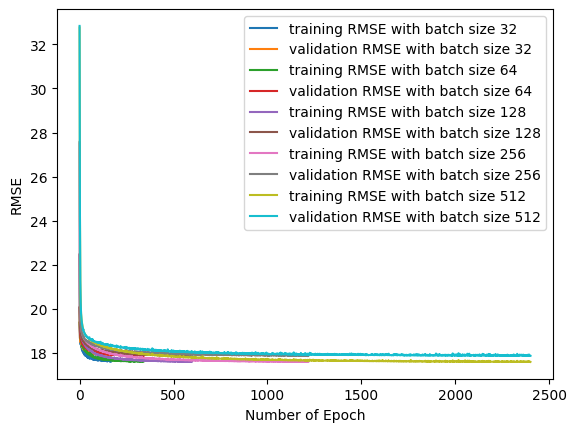

In [7]:
#Sweep different values for the mini-batch size 
batch_sizes = [2**i for i in range(5, 13)]
converge_batch_sizes = []
converge_threshold = CT
for batch_size in batch_sizes:
  print(f"Training with batch_size {batch_size}")
  weights, rmse_train_list, rmse_val_list, elapsed_time, diverge = part4(x_train_std, y_train_std, x_val_std, y_val_std, batch_size, 0.01, converge_threshold)
  if diverge: 
    pass
  else: 
    converge_batch_sizes.append(batch_size)
    print(f"Batch_size {batch_size} has converged!")
    plt.plot(rmse_train_list, label = f'training RMSE with batch size {batch_size}')
    plt.plot(rmse_val_list, label = f'validation RMSE with batch size {batch_size}')
# plot RMSE vs epoch
plt.xlabel("Number of Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.show()

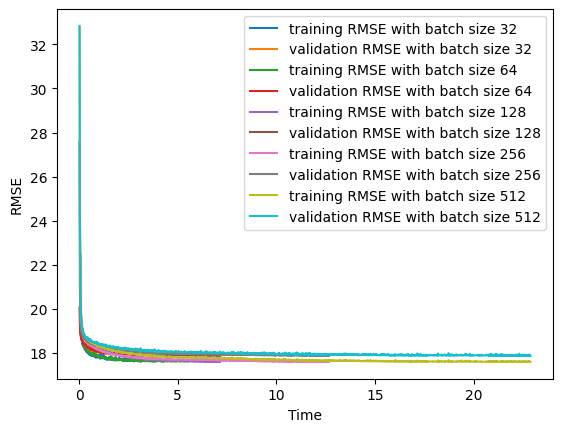

In [8]:
#plot RMSE vs time
converge_times = []
for batch_size in converge_batch_sizes:
    weights, rmse_train_list, rmse_val_list, elapsed_time, diverge = part4(x_train_std, y_train_std, x_val_std, y_val_std, batch_size, 0.01, converge_threshold)
    converge_times.append(elapsed_time[-1])
    plt.plot(elapsed_time, rmse_train_list, label = f'training RMSE with batch size {batch_size}')
    plt.plot(elapsed_time, rmse_val_list, label = f'validation RMSE with batch size {batch_size}')
    plt.xlabel("Time")
    plt.ylabel("RMSE")
    plt.legend()
plt.show()

#find the batch_size with fastest converge time
index = converge_times.index(min(converge_times))
batch_fast = converge_batch_sizes[index]

Early stopping: model cannot converge with batch size 2
Early stopping: model cannot converge with batch size 4
Early stopping: model cannot converge with batch size 1024
Early stopping: model cannot converge with batch size 2048
Early stopping: model cannot converge with batch size 4096


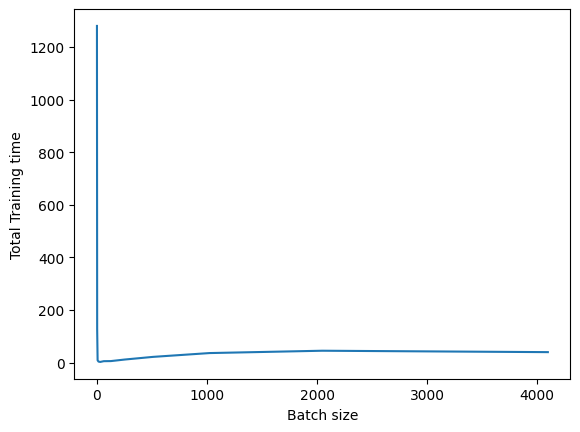

In [9]:
# plot total training time VS batch_size
batch_sizes = [2**i for i in range(1, 13)]
total_time_list = []
for batch_size in batch_sizes:
    weights, rmse_train_list, rmse_val_list, elapsed_time, diverge = part4(x_train_std, y_train_std, x_val_std, y_val_std, batch_size, 0.01, converge_threshold)
    total_time_list.append(elapsed_time[-1])

plt.plot(batch_sizes, total_time_list)
plt.xlabel("Batch size")
plt.ylabel("Total Training time")
plt.show()

 

## Part 5 - Gradient Descent Learning Rate [3 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. Pick 3 batch sizes that do not converge with a learning rate of $\alpha= 0.01$ (last part) and try to find a learning rate that results in convergence for each batch size. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[1]**

Ans: see cell #10.
2. Select the best batch size based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD. 
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**

  Ans: see cell #11.
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**

  Ans: see cell #11.
  * Describe your findings, including the main takeaways from each of your plots. **[1]**

  Ans: For the first plot, we see that if the learning rate is large, then the model converges with fewer epochs and the RMSE curve will be oscillating a lot. If the learning rate is low, the model takes more epochs to converge but the RMSE curve is more flat. This is because when the learning rate is large, the weights of the model are updated quickly, and this can cause the model to overshoot the optimal values and oscillate back and forth around them. 

  For the second plot, it is similar to the first plot that model with higher learning rate converges quicker. This is because it updates the model parameters with a larger step in each iteration, therefore leads to quicker convergence. Also, we observe that large learning rate leads to more oscillations as in the first plot.

In [10]:
### YOUR CODE HERE ###
# from part4, when batch size = 1024, 2048, 4096, the model does not converge
batch_sizes = [1024, 2048, 4096]
lrs = [0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.005, 0.001, 1e-4, 1e-5]
lrs_converge = []
rmse_train = []
rmse_val = []
# find converge lr for each batch size
for batch_size in batch_sizes:
  for lr in lrs:
    weights, rmse_train_list, rmse_val_list, elapsed_time, diverge = part4(x_train_std, y_train_std, x_val_std, y_val_std, batch_size, lr, converge_threshold)
    if diverge == False:
      print(f"Model with batch size {batch_size} converges with lr {lr}")
      lrs_converge.append(lr)
      rmse_train.append(rmse_train_list[-1])
      rmse_val.append(rmse_val_list[-1])
      break
# make table
df = pd.DataFrame(list(zip(batch_sizes, lrs_converge, rmse_train, rmse_val)),columns =['Batch_size', 'Learning rate', 'RMSE_train', 'RMSE_val'])
df

Early stopping: model cannot converge with batch size 1024
Early stopping: model cannot converge with batch size 1024
Early stopping: model cannot converge with batch size 1024
Early stopping: model cannot converge with batch size 1024
Model with batch size 1024 converges with lr 0.06
Early stopping: model cannot converge with batch size 2048
Early stopping: model cannot converge with batch size 2048
Early stopping: model cannot converge with batch size 2048
Early stopping: model cannot converge with batch size 2048
Model with batch size 2048 converges with lr 0.06
Early stopping: model cannot converge with batch size 4096
Early stopping: model cannot converge with batch size 4096
Early stopping: model cannot converge with batch size 4096
Early stopping: model cannot converge with batch size 4096
Model with batch size 4096 converges with lr 0.06


,Batch_size,Learning rate,RMSE_train,RMSE_val
0,1024,0.06,17.591945,17.862910
1,2048,0.06,17.602013,17.858949
2,4096,0.06,17.600380,17.862100


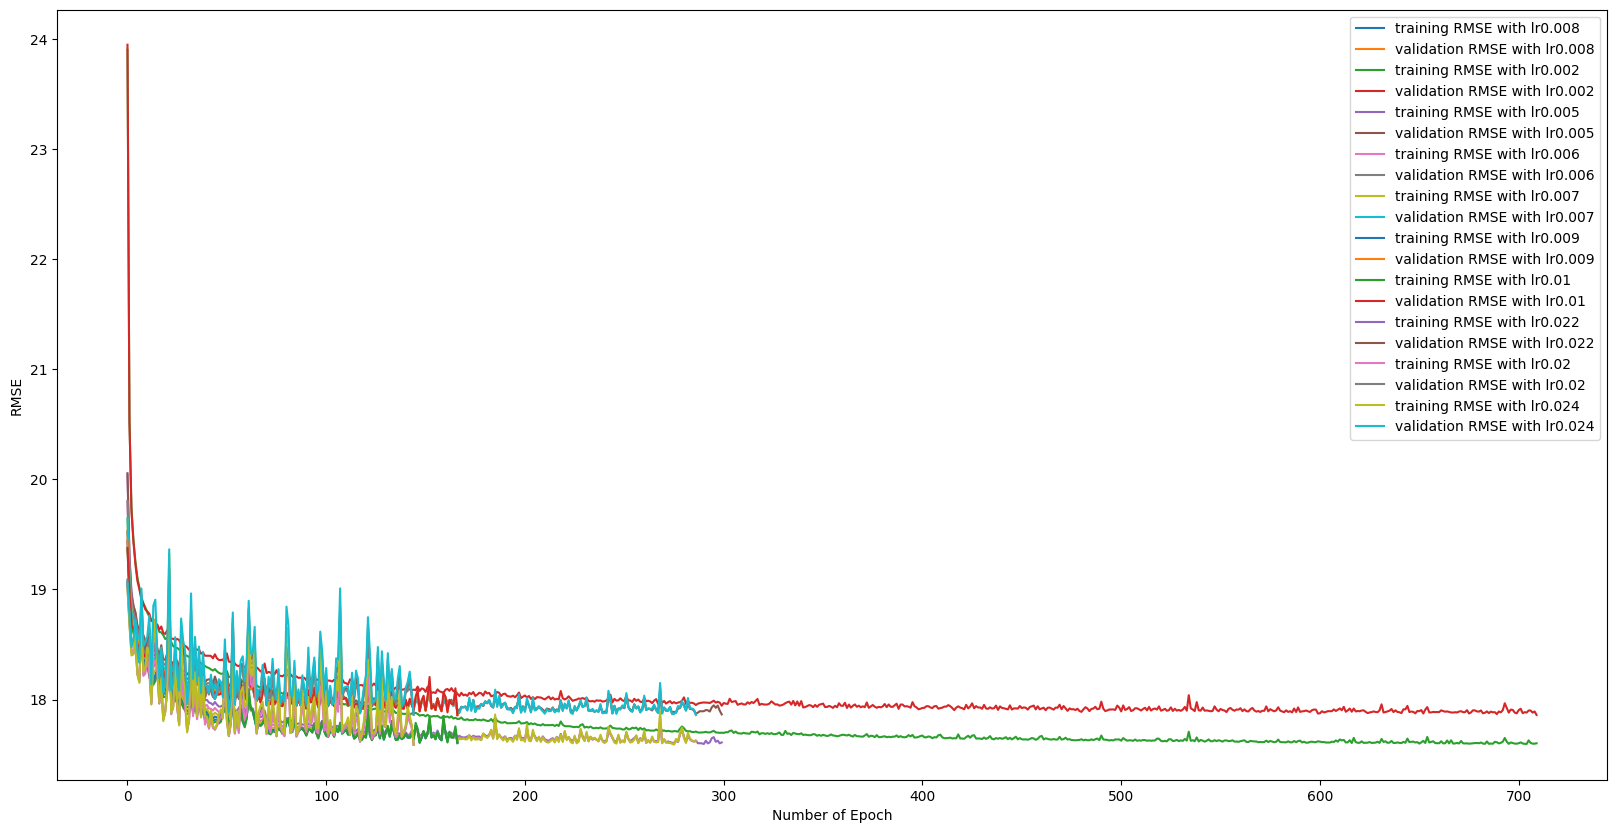

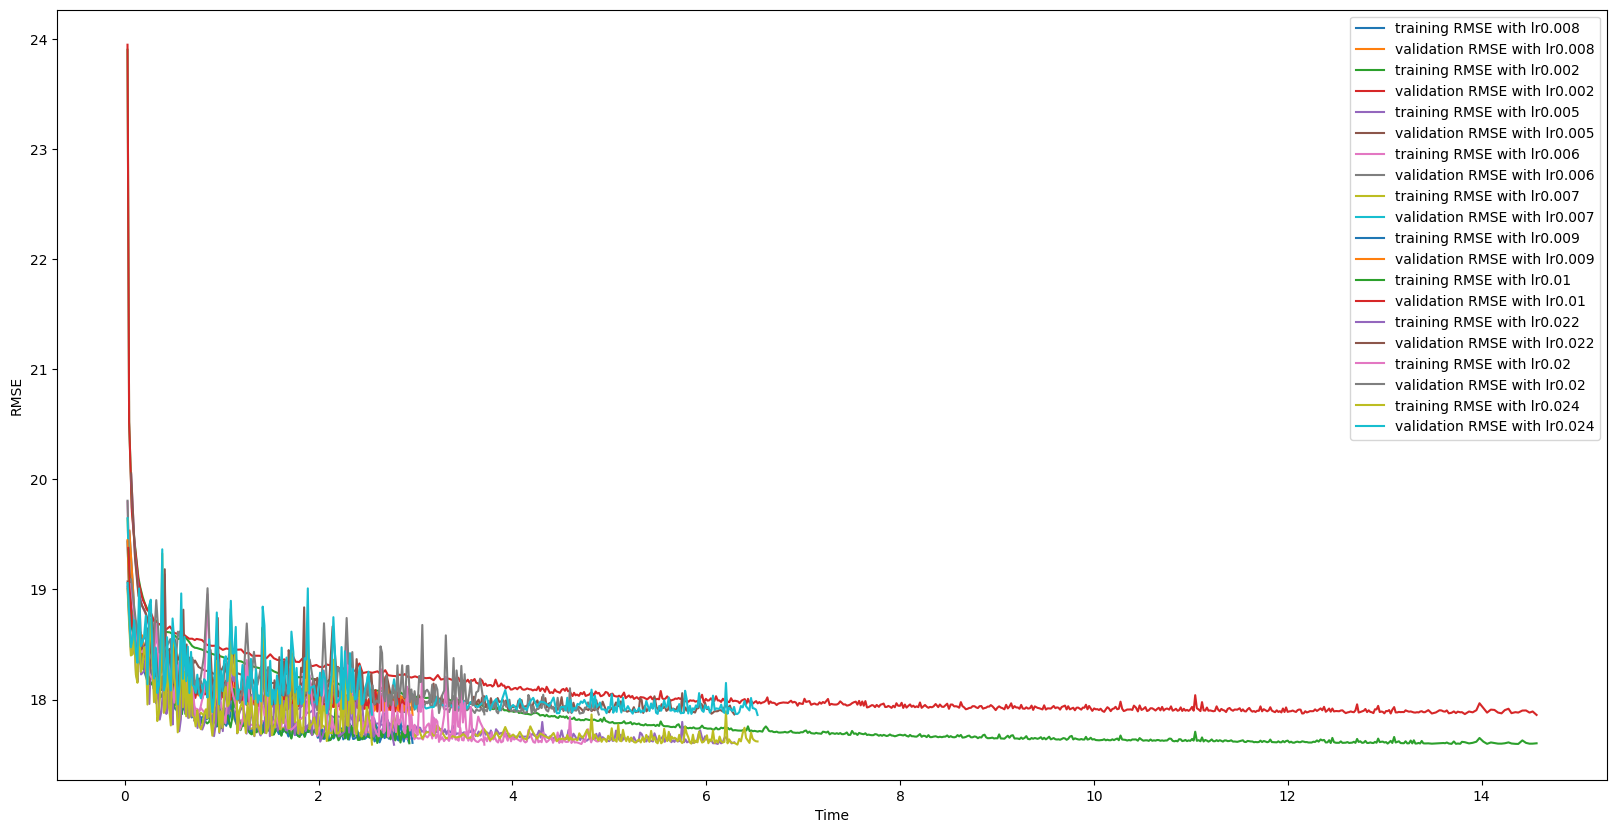

In [11]:
# sweep the learning rate for the fastest converge batch size

lrs = [0.008, 0.002, 0.005, 0.006, 0.007, 0.009, 0.01, 0.022, 0.02, 0.024]
plt.figure(figsize=(20,10))
for lr in lrs:
   weights, rmse_train_list, rmse_val_list, elapsed_time, diverge = part4(x_train_std, y_train_std, x_val_std, y_val_std, batch_fast, lr, converge_threshold)
   if diverge == False:
     plt.plot(rmse_train_list, label = f'training RMSE with lr{lr}')
     plt.plot(rmse_val_list, label = f'validation RMSE with lr{lr}')
   else:
     print(f"Model does not converge with lr = {lr}")
# plot RMSE vs epoch
plt.xlabel("Number of Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.show()

#plot RMSE vs time
plt.figure(figsize=(20,10))
for lr in lrs:
    weights, rmse_train_list, rmse_val_list, elapsed_time, diverge = part4(x_train_std, y_train_std, x_val_std, y_val_std, batch_fast, lr, converge_threshold)
    if diverge == False:
      plt.plot(elapsed_time, rmse_train_list, label = f'training RMSE with lr{lr}')
      plt.plot(elapsed_time, rmse_val_list, label = f'validation RMSE with lr{lr}')
    else:
      print(f"Model does not converge with lr = {lr}")

plt.xlabel("Time")
plt.ylabel("RMSE")
plt.legend()
plt.show()


## Part 6 - Getting started with Github  [3 marks]

This final part of the project assignment is to be completed independently from Parts 1 - 5. In this part you will be completing some additional coding tasks using a different dataset and submitting your results on Github. To access this part of the assignment and upload your answers, you will need to use Github. Please complete the following step-by-step instructions:

 0. Create a Github account and install git for Windows or Mac: 
  * https://git-scm.com/download/win
  * https://git-scm.com/download/mac

 1. Open this link: https://classroom.github.com/a/ODb_vtN2 to create your assignment repository in GitHub. You should get a link similar to:
```
https://github.com/APS-1070-W23/project-4-*********
```
This your private repository to get this part questions and upload your answers. **Copy this link to the text box below to be graded for this part.**

Ans: https://github.com/APS1070-W23/project-4-BillZou123
 2. Open `Git Bash`, the app you downloaded in step `0`, and set your Email and username by:
```
git config --global user.email “<your-GitHub-email>”
git config --global user.name “<your-GitHub-username>”
```

 3. Create a folder for the course on your computer and `cd` to that. `cd` means `Change Directory`. For example, on a Windows machine, where I have a folder on "C:\aps1070":
 ```
cd c:aps1070
```
 4. Get your assignment by the link you got in step 1:
```
git clone https://github.com/APS-1070-W23/project-4-*********
```

 5. A new folder should be created in your directory similar to:
```
C:\aps1070\project-4-********
```
This folder has an `ipynb` notebook which you need to manually upload to colab and answer its questions. 

 6. After you finished working on this notebook, download the notebook from colab and move it to the directory in step 5.

 7. Replace the old notebook with the new one that has your answers. Make sure your completed notebook has the same name as the original notebook you downloaded. 

 8. To submit your work, follow: 
```
cd <your assignment folder>
git add W23_Project_4_git.ipynb
git commit -m “Final Submission”
git push 
```
If you have any problem with pushing your work on GitHub you can try one of following commands:
```
git push --force
or 
git push origin HEAD:main
```

 9. Make sure your submission is ready for grading. Open the private repository link in your browser and make sure you can see your final submission with your latest changes there. **Only you and the teaching team can open that link.**